# Detecção de pontos salientes

Usaremos a biblioteca OpenCV para detectar pontos salientes em uma imagem

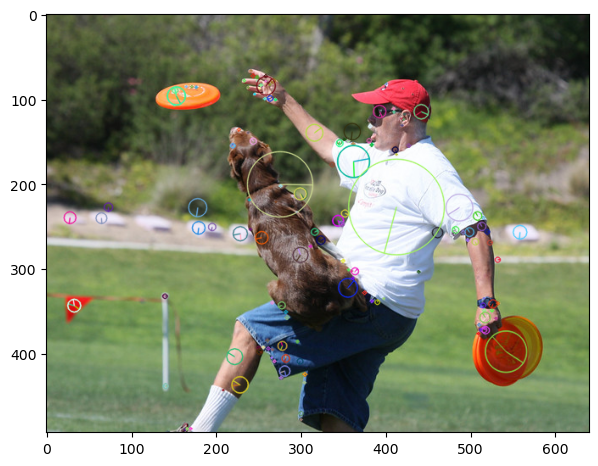

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def unpack_octave(kpt_octave):
    """Obtém informação sobre a escala de um ponto saliente do OpenCV"""

    _octave = kpt_octave
    octave = _octave&0xFF
    layer  = (_octave>>8)&0xFF
    if octave>=128:
        octave |= -128
    if octave>=0:
        scale = float(1/(1<<octave))
    else:
        scale = float(1<<-octave)
    return octave, layer, scale

def keypoint_info(kpt):
    """Imprime informação sobre um ponto saliente"""
    
    octave, layer, scale = unpack_octave(kpt.octave)
    data = {
        'position': (kpt.pt[0], kpt.pt[1]),
        'angle': kpt.angle,
        'size': kpt.size,
        'octave': octave,   # Oitava (resolução) na qual o keypoint foi detectado
        'layer': layer,     # Nível de suavização na oitava
        'scale': scale,     # Fração de escala em relação à imagem original
        'response': kpt.response  # Valor do Laplaciano da Gaussiana
    }
    
    for name, value in data.items():
        print(f'{name}: {value}')
 
img = cv2.imread('../data/man_with_dog.jpg')
# Imagem RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Imagem nível de cinza para o método SIFT
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create(
    nfeatures=200,          # Número máximo de pontos salientes
    nOctaveLayers=3,        # Número de escalas na pirâmide Gaussiana
    contrastThreshold=0.04, # Saliência mínima de um ponto saliente
    edgeThreshold=10,       # Linearidade máxima, remove arestas salientes
    sigma=1.6               # Suavização no primeiro nível da pirâmide Gaussiana
    )
keypoints = sift.detect(img_gray, None)
 
# Desenha pontos salientes detectados na imagem
img_out = cv2.drawKeypoints(
    img, 
    keypoints, 
    None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
 
plt.figure(figsize=(7,7))
plt.imshow(img_out)

In [45]:
# Informações do primeiro ponto saliente
keypoint_info(keypoints[0])

position: (245.4113006591797, 93.91942596435547)
angle: 249.93011474609375
size: 1.9456541538238525
octave: -1
layer: 1
scale: 2.0
response: 0.07858161628246307


In [46]:
for k in keypoints:
    print(k.pt, k.size, k.response)

(245.4113006591797, 93.91942596435547) 1.9456541538238525 0.07858161628246307
(263.7362060546875, 99.09492492675781) 6.3345746994018555 0.06426998227834702
(283.7403564453125, 357.46429443359375) 4.414499759674072 0.06557618826627731
(514.987548828125, 240.0321807861328) 3.8510475158691406 0.06268011033535004
(251.2965850830078, 86.87178802490234) 1.9057912826538086 0.06476947665214539
(228.53567504882812, 258.7030944824219) 17.047008514404297 0.06179841607809067
(228.53567504882812, 258.7030944824219) 17.047008514404297 0.06179841607809067
(513.2001342773438, 250.07284545898438) 9.89820384979248 0.06855019181966782
(421.01348876953125, 123.72889709472656) 2.3013463020324707 0.06191929802298546
(381.7911071777344, 131.8486328125) 3.867513656616211 0.06621067225933075
(245.4113006591797, 93.91942596435547) 1.9456541538238525 0.07858161628246307
(165.8911895751953, 488.83819580078125) 3.121502637863159 0.06243405491113663
(491.3121032714844, 256.9098815917969) 4.824252605438232 0.0650000

### Criação de descritores

O método SIFT cria um vetor de características de 128 valores para cada ponto saliente detectado

In [48]:
_, descriptors = sift.compute(img_gray, keypoints)
print(descriptors.shape)
print(descriptors[0])

(50, 128)
[  1.   0.   0.   0.   0.   0.  11.  20.   3.   4.   0.   0.   0.   9.
  54.  32.   2.  15.   4.   0.   1.  28.  28.   2.  11.  15.  11.   0.
   0.   1.   0.   3.  41.   0.   0.   0.   0.   0.   4.  44. 129.   6.
   0.   1.  10.  50. 100. 129.  11.   2.   1.   3. 129. 129.  70.  18.
  24.   3.   2.   1.  19.  13.   2.  49.  51.   1.   0.   0.   0.   0.
   7.  75. 129.  28.  14.  46.  23.   8.   5.  61.  29.   9.  11. 129.
 129.  47.   8.  16.  24.   0.   0.   3.  26.   8.   6. 125.  13.   0.
   0.   0.   1.   1.   8. 129.  36.   2.   6.  93.  67.   5.   6.  82.
  25.   2.   5. 123.  39.   1.   2.  61.  34.   0.   0.   2.   4.   0.
   4. 129.]
